**First Part**

**IBM Data Science_Capstone Project - Predicting Car Accident Severity**


The IBM Watson notebook given below contains the methodology, steps and analysis performed to better understand the Predictin of Traffic Accident Severity project. Information from RAW data is converted into its useful form when serves as the information for this analysis. RAW information is from a Kaggle dataset (https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016). It containas all the necessary details of traffic accidents which is the core data set to perform the analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [2]:
# The code was removed by Watson Studio for sharing.

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [3]:

body = client_474209bebdc54cf09d26618f32724f8c.get_object(Bucket='thisnotebookwillbemainlyusedforth-donotdelete-pr-mnsmwxze4zqazx',Key='places.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [4]:

body = client_474209bebdc54cf09d26618f32724f8c.get_object(Bucket='thisnotebookwillbemainlyusedforth-donotdelete-pr-mnsmwxze4zqazx',Key='users.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [5]:

body = client_474209bebdc54cf09d26618f32724f8c.get_object(Bucket='thisnotebookwillbemainlyusedforth-donotdelete-pr-mnsmwxze4zqazx',Key='vehicles.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02


In [6]:

body = client_474209bebdc54cf09d26618f32724f8c.get_object(Bucket='thisnotebookwillbemainlyusedforth-donotdelete-pr-mnsmwxze4zqazx',Key='holidays.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()


,ds,holiday
0,2005-01-01,New year
1,2005-03-28,Easter Monday
2,2005-05-01,Labour Day
3,2005-05-05,Ascension Thursday
4,2005-05-08,Victory in Europe Day


**Importing Data**

* Dropping all features that are insignificant for the analysis.

* For better understanding, names are to be modified for analysis.

* Summery of dataset is going to be made.

* Features regarding date and time are to be crafted.

**Places | Charactereistics**

In [7]:
df_data_1.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

In [8]:
# Elliminating irrevelent coloums.

df_data_1.drop(['adr','com', 'gps'], axis=1, inplace=True)
df_data_2.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
df_data_4.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(df_data_1.shape, df_data_2.shape, df_data_4.shape, df_data_3.shape)
df_data_2

(839985, 13) (839985, 12) (1433389, 2) (1876005, 12)


,Num_Acc,catr,voie,circ,nbv,vosp,prof,plan,surf,infra,situ,env1
0,201600000001,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
5,201600000006,3.0,41,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
6,201600000007,3.0,1,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
7,201600000008,3.0,2,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
8,201600000009,4.0,0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,99.0
9,201600000010,4.0,0,2.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,0.0



Samples in characteristics and places whihc are the same, with a much higher number in vehicles and users data frames and there can be multiple vehicles and users involved in a car accident.

In [10]:
df_data_1.columns = ['ID', 'year', 'month', 'day', 'time', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'dep']
df_data_2.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df = df_data_1.merge(df_data_2, how='inner',on='ID')
df.head(5)

,ID,year,month,day,time,lum,agg,int,atm,col,...,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


**Vehicles**


In [11]:
categories = df_data_4['catv'].value_counts().sort_index()
print(categories.shape)
categories

(33,)


1      58128
2      79884
3       5008
4       7463
5      21816
6         39
7     890217
8        120
9        300
10     70205
11        17
12        79
13      5295
14     15392
15     11782
16       657
17     11501
18      2075
19       183
20      1383
21      2762
30     59918
31     28038
32     29596
33     97185
34     13436
35       367
36      1624
37      9071
38      2524
39       328
40      1555
99      5441
Name: catv, dtype: int64

Vehicle Category values does not match with the description of its features. The dataset describes 13 varying vehicle categories for 33 different vehicle classifications found within the data set. Therefore not to use the data set with missing values.

**Users**
This dataset consists of descriptions of perope involved in the accident. Relevent inoformation is selected which can provide a meaningful analysis.

* num_users: users in accident.
* ped: pedestrians involved in accident.
* critic_age: users of critical age ranges involved in accident. Being the critical ages, the ones with more deaths accounted from 2005 to 2016.
* dead_age: users with higher death toll, specifically where from every 10 users of this age at least one dies.
* sev: severity of the accident

In [12]:

df_data_3.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [13]:
df_data_3.drop(['place', 'sexe', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], axis=1, inplace=True)
df_data_3.columns = ['ID', 'catu', 'grav', 'secu', 'year_birth']
df_data_3.sort_values(by='ID').head(10)

,ID,catu,grav,secu,year_birth
1678507,200500000001,1,4,11.0,1976.0
1678512,200500000001,2,1,11.0,1991.0
1678511,200500000001,2,1,11.0,1998.0
1678508,200500000001,1,3,11.0,1968.0
1678509,200500000001,2,1,11.0,1964.0
1678510,200500000001,2,1,31.0,2004.0
1678514,200500000002,1,3,21.0,1979.0
1678513,200500000002,1,1,11.0,1955.0
1678516,200500000003,1,3,21.0,1956.0
1678515,200500000003,1,1,21.0,1983.0


In [14]:
df_data_3

,ID,catu,grav,secu,year_birth
0,201600000001,1,1,11.0,1983.0
1,201600000001,1,3,21.0,2001.0
2,201600000002,1,3,11.0,1960.0
3,201600000002,2,3,11.0,2000.0
4,201600000002,2,3,11.0,1962.0
5,201600000003,1,1,11.0,1997.0
6,201600000003,3,3,NaN,1970.0
7,201600000004,1,3,23.0,1999.0
8,201600000004,2,4,23.0,1999.0
9,201600000004,1,1,11.0,1985.0


In [15]:
# total Number of Users
num_users = df_data_3.ID.value_counts().sort_index(ascending=True)
num_users

200500000001    6
200500000002    2
200500000003    2
200500000004    4
200500000005    2
200500000006    1
200500000007    2
200500000008    1
200500000009    3
200500000010    2
200500000011    4
200500000012    1
200500000013    1
200500000014    3
200500000015    1
200500000016    3
200500000017    2
200500000018    2
200500000019    2
200500000020    3
200500000021    2
200500000022    2
200500000023    2
200500000024    3
200500000025    2
200500000026    3
200500000027    3
200500000028    6
200500000029    3
200500000030    2
               ..
201600059403    1
201600059404    2
201600059405    3
201600059406    2
201600059407    2
201600059408    1
201600059409    2
201600059410    2
201600059411    1
201600059412    3
201600059413    1
201600059414    2
201600059415    2
201600059416    2
201600059417    1
201600059418    2
201600059419    1
201600059420    2
201600059421    2
201600059422    2
201600059423    2
201600059424    1
201600059425    1
201600059426    3
2016000594

In [16]:
## total Number of pedestrians

df_data_3['ped'] = df_data_3['catu'].apply(lambda x: 1 if x==3 else 0)
df_data_3.head(5)

,ID,catu,grav,secu,year_birth,ped
0,201600000001,1,1,11.0,1983.0,0
1,201600000001,1,3,21.0,2001.0,0
2,201600000002,1,3,11.0,1960.0,0
3,201600000002,2,3,11.0,2000.0,0
4,201600000002,2,3,11.0,1962.0,0


In [17]:
df_data_32 = df_data_3.groupby('ID').sum()
ped = df_data_32.ped
print('Accidents in which pedestrians have been involved:')
df_data_32.ped.value_counts()

Accidents in which pedestrians have been involved:


0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
10         4
9          3
8          2
25         1
21         1
15         1
Name: ped, dtype: int64

In [18]:
# crical age in data set

acc_year = df_data_3.ID.astype(str).str[:4] # year of the accident
age = acc_year.astype(int) - df_data_3['year_birth'] # age of the user
df_data_3['age']= age
df_data_3

,ID,catu,grav,secu,year_birth,ped,age
0,201600000001,1,1,11.0,1983.0,0,33.0
1,201600000001,1,3,21.0,2001.0,0,15.0
2,201600000002,1,3,11.0,1960.0,0,56.0
3,201600000002,2,3,11.0,2000.0,0,16.0
4,201600000002,2,3,11.0,1962.0,0,54.0
5,201600000003,1,1,11.0,1997.0,0,19.0
6,201600000003,3,3,NaN,1970.0,1,46.0
7,201600000004,1,3,23.0,1999.0,0,17.0
8,201600000004,2,4,23.0,1999.0,0,17.0
9,201600000004,1,1,11.0,1985.0,0,31.0


In [20]:
df2 = df_data_3[df_data_3['grav']==2]
deaths = df2['age'].value_counts()
deaths.sort_values(ascending=False)

total, suma, i = deaths.values.sum(), 0, 0

for num in deaths.values:
    suma += num
    per = (suma/total)*100
    if per<=50:
        i += 1
        percentage = per
print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(percentage,total,i))

A  49.96 percent of a total of 50487 deaths is found on the 25 first ages, being the deaths array sorted by number of deaths.



As per the World Health Organization, mortality rates in road traffic injuries for a population 100,000 population in France was 7.5 during the year 2008. Keeping an account for a 64 millions population (from 2005 to 2016) living in France, decreasing in the past years, there should be around 57k deaths from 2005 to 2016. This is how we crosscheck, the dataset is accurate.

In [21]:
topdeaths = deaths.head(15)
print('Half of the deaths in a car accident are aged between % 2d and % 2.0i y.o.'
      % (topdeaths.index.min(), topdeaths.index.max()))
topdeaths

Half of the deaths in a car accident are aged between  17 and  31 y.o.


20.0    1630
21.0    1600
22.0    1582
19.0    1529
23.0    1401
24.0    1401
25.0    1289
18.0    1219
26.0    1177
27.0    1006
28.0     923
29.0     918
31.0     822
17.0     811
30.0     801
Name: age, dtype: int64

Text(0.5, 1.0, 'Total number of deahts by age from 2005 to 2016')

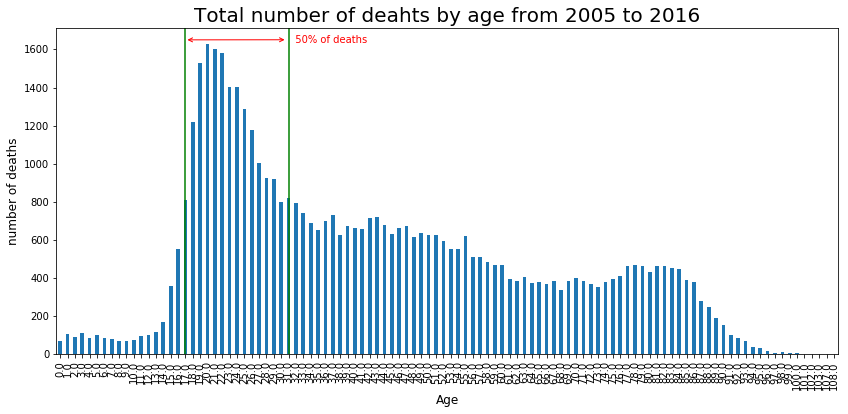

In [22]:
#Ploting number of deaths by age

pd.DataFrame(deaths)
dplot=deaths.sort_index()
dplot.plot.bar(figsize=(14,6))

plt.annotate('  50% of deaths',
             color='r',
            xy=(17,1650),
            xytext=(31,1635),
            arrowprops=dict(arrowstyle='<->', color='r')
            )

plt.axvline(x=17, color='g', linestyle='-')
plt.axvline(x=31, color='g', linestyle='-')

plt.xlabel('Age', size=12)
plt.ylabel('number of deaths', size=12)
plt.title('Total number of deahts by age from 2005 to 2016', size=20)

People older than 84 are more likely to die with at least 1 out of 10 of the times, rising to beyond 35% in some cases.


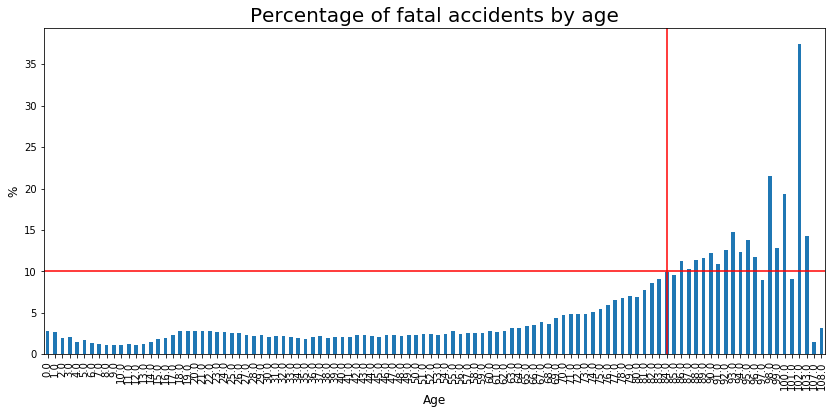

In [24]:
#Death by age in dataset
death = df2['age'].value_counts().sort_index()
total = df_data_3['age'].value_counts().sort_index()
death_prop = (deaths/total)*100
d = death_prop.dropna()
minimum = d[d>9.9].index.min()
d.plot.bar(figsize=(14,6))
# plt.xticks(range(108)[0::2])
plt.title('Percentage of fatal accidents by age', size=20)
plt.xlabel('Age', size=12)
plt.ylabel('%', size=12)
plt.axhline(y=10, color='r')
plt.axvline(x=84, color='r')
print('People older than {0:2} are more likely to die\
 with at least 1 out of 10 of the times, rising to beyond 35% in some cases.'.format(int(minimum)))

In [25]:
df_data_3['crit_age'] = df_data_3['age'].apply(lambda x: 1 if 17<=x<=31 else 0)
df_data_3['dead_age'] = df_data_3['age'].apply(lambda x: 1 if x>84 else 0)

df_data_3.head(5)

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age
0,201600000001,1,1,11.0,1983.0,0,33.0,0,0
1,201600000001,1,3,21.0,2001.0,0,15.0,0,0
2,201600000002,1,3,11.0,1960.0,0,56.0,0,0
3,201600000002,2,3,11.0,2000.0,0,16.0,0,0
4,201600000002,2,3,11.0,1962.0,0,54.0,0,0


In [26]:
df2 = df_data_3.groupby('ID').sum().sort_index(ascending=True)
df2['crit_age1'] = df2['crit_age'].apply(lambda x: 1 if x>0 else 0)
df2['dead_age1'] = df2['dead_age'].apply(lambda x: 1 if x>0 else 0)
df2['ped1'] = df2['ped'].apply(lambda x: 1 if x>0 else 0)
df2['num_us'] = num_users
df2

,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us
ID,,,,,,,,,,,,
200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6
200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2
200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2
200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4
200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2
200500000006,1,2,11.0,1951.0,0,54.0,0,0,0,0,0,1
200500000007,2,5,22.0,3948.0,0,62.0,1,0,1,0,0,2
200500000008,1,3,11.0,1978.0,0,27.0,1,0,1,0,0,1
200500000009,4,11,33.0,5817.0,0,198.0,0,0,0,0,0,3



The severity from the gravity feature of the users dataset. Cosists of labels given as follows

* Unscathed
* Dead
* Hospitalized Wonded
* Light Injury

Simplifying two labels and sort them (gravity), giving 0 --> cases of unscathed or light injury and 1 --> cases of hospitalized/deads. The severity of accident = the maximum gravity of users.

In [28]:
def change_grav(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = df_data_3[['ID', 'grav']].copy()
df3['grav'] = df_data_3['grav'].apply(change_grav)
df3.sort_values(by='ID')

,ID,grav
1678507,200500000001,0
1678512,200500000001,0
1678511,200500000001,0
1678508,200500000001,1
1678509,200500000001,0
1678510,200500000001,0
1678514,200500000002,1
1678513,200500000002,0
1678516,200500000003,1
1678515,200500000003,0


In [29]:

severity = df3[['grav', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,grav
ID,
200500000001,1
200500000002,1
200500000003,1
200500000004,1
200500000005,1
200500000006,1
200500000007,0
200500000008,1
200500000009,1


In [30]:

df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us,sev
0,200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6,1
1,200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2,1
2,200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2,1
3,200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4,1
4,200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2,1
5,200500000006,1,2,11.0,1951.0,0,54.0,0,0,0,0,0,1,1
6,200500000007,2,5,22.0,3948.0,0,62.0,1,0,1,0,0,2,0
7,200500000008,1,3,11.0,1978.0,0,27.0,1,0,1,0,0,1,1
8,200500000009,4,11,33.0,5817.0,0,198.0,0,0,0,0,0,3,1
9,200500000010,4,4,11.0,3912.0,1,98.0,0,0,0,0,1,2,1


The last 4 parts/features of the dataset of df2 with the previous features

In [31]:
print('Both data frames having same number of rows is an indicator that any accident has been left behind')
df.shape, df2.shape

Both data frames having same number of rows is an indicator that any accident has been left behind


((839985, 24), (839985, 14))

In [32]:

df = df.merge(df2[['ID','crit_age1', 'ped1','dead_age1', 'num_us', 'sev']], on='ID', how='left')
df

,ID,year,month,day,time,lum,agg,int,atm,col,...,shape,surf,infra,situation,school,crit_age1,ped1,dead_age1,num_us,sev
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1
5,201600000006,16,12,23,1115,1,2,1,7.0,6.0,...,1.0,1.0,0.0,1.0,99.0,0,1,0,2,1
6,201600000007,16,5,1,1145,1,2,1,7.0,2.0,...,1.0,1.0,0.0,1.0,99.0,0,0,0,3,0
7,201600000008,16,5,14,1915,2,1,1,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0,0,0,3,1
8,201600000009,16,9,23,1900,1,2,1,1.0,3.0,...,0.0,1.0,0.0,1.0,99.0,0,0,0,2,1
9,201600000010,16,12,30,1030,1,1,1,9.0,6.0,...,1.0,7.0,0.0,1.0,0.0,0,1,0,2,1


Differentiating accidents for holidays or weekends

**Datetime**

In [34]:
from datetime import datetime 

dt = df[['ID','year', 'month', 'day', 'time' ]]
#weekday
date = (dt.year+2000)*10000+dt.month*100+dt.day
dt['date'] = pd.to_datetime(date, format='%Y%m%d')
dt['weekday'] = dt['date'].dt.weekday #weekday functin from datetime gives a number to each day of the week from 0 to 6.

#weekend
dt['weekend'] = dt['weekday'].apply(lambda x: 1 if x>4 else 0)

#night
# dt['night'] = dt['hhmm'].apply(lambda x: 1 if 700>x or x>2100 else 0) 

#holiday
dt.loc[dt.date.isin(df_data_5.ds) , 'holiday'] = 1
dt.holiday.fillna(0, inplace=True)
dt.head(5)

,ID,year,month,day,time,date,weekday,weekend,holiday
0,201600000001,16,2,1,1445,2016-02-01,0,0,0.0
1,201600000002,16,3,16,1800,2016-03-16,2,0,0.0
2,201600000003,16,7,13,1900,2016-07-13,2,0,0.0
3,201600000004,16,8,15,1930,2016-08-15,0,0,1.0
4,201600000005,16,12,23,1100,2016-12-23,4,0,0.0


In [35]:
df = df.merge(dt[['ID', 'date', 'weekend', 'holiday']],on='ID', how='left')
df.drop(['year', 'month', 'day'], axis=1, inplace=True)
df.head()

,ID,time,lum,agg,int,atm,col,lat,long,dep,...,situation,school,crit_age1,ped1,dead_age1,num_us,sev,date,weekend,holiday
0,201600000001,1445,1,2,1,8.0,3.0,0.0,0,590,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,1800,1,2,6,1.0,6.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,1900,1,1,1,1.0,6.0,0.0,0,590,...,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,1930,2,2,1,7.0,3.0,0.0,0,590,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,1100,1,2,3,1.0,3.0,0.0,0,590,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0


Precision is reduces to hours

In [36]:
df['time'] = df.time.div(100).apply(np.floor)

In [38]:
df.rename(columns={'crit_age1':'crit_age','dead_age1':'dead_age', 'ped1':'ped'},inplace=True)
df.to_csv('Data.csv')

The continuation is in the next Notebook